In [1]:
# Import our dependencies
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import tensorflow as tf
import sklearn as skl
import matplotlib as plt

C:\Users\Janetfanatic\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Janetfanatic\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Janetfanatic\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Janetfanatic\anaconda3\envs\

In [64]:
# Loading the prprocessed charity data set
file_path = "Resources/charity_data.csv"
charity_df = pd.read_csv(file_path)
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [65]:
#  Check DataFrame for Null values
for column in charity_df.columns:
    print(f"Column {column} has{charity_df[column].isna().sum()} null values")

Column EIN has0 null values
Column NAME has0 null values
Column APPLICATION_TYPE has0 null values
Column AFFILIATION has0 null values
Column CLASSIFICATION has0 null values
Column USE_CASE has0 null values
Column ORGANIZATION has0 null values
Column STATUS has0 null values
Column INCOME_AMT has0 null values
Column SPECIAL_CONSIDERATIONS has0 null values
Column ASK_AMT has0 null values
Column IS_SUCCESSFUL has0 null values


In [66]:
# Generate our categorical variable list
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()

In [67]:
# Check the number of unique values in each column
charity_df[charity_cat].nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
dtype: int64

In [68]:
# Examine statistics of DataFrame
charity_df.describe()

,EIN,STATUS,ASK_AMT,IS_SUCCESSFUL
count,3.429900e+04,34299.000000,3.429900e+04,34299.000000
mean,5.191852e+08,0.999854,2.769199e+06,0.532406
std,2.451472e+08,0.012073,8.713045e+07,0.498956
min,1.052060e+07,0.000000,5.000000e+03,0.000000
25%,2.748482e+08,1.000000,5.000000e+03,0.000000
50%,4.656317e+08,1.000000,5.000000e+03,1.000000
75%,7.526117e+08,1.000000,7.742000e+03,1.000000
max,9.960869e+08,1.000000,8.597806e+09,1.000000


In [69]:
# Check the unique value counts to see if binning is required
app_count = charity_df.APPLICATION_TYPE.value_counts()
app_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

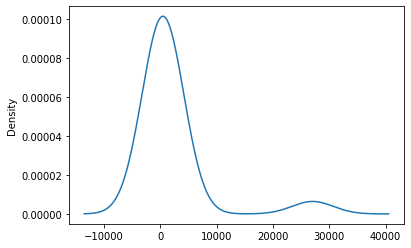

In [70]:
# Visualize the value counts
app_count.plot.density()

In [71]:
# Check the unique value counts to see if binning is required
name_count = charity_df.NAME.value_counts()
name_count 

PARENT BOOSTER USA INC                                          1260
TOPS CLUB INC                                                    765
UNITED STATES BOWLING CONGRESS INC                               700
WASHINGTON STATE UNIVERSITY                                      492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                  408
                                                                ... 
MOTHERS OF MURDERED YOUTH                                          1
SANTA CLARITA VALLEY QUILT GUILD                                   1
CHEVRON RETIREESS ASSOCIATION                                      1
CENTRAL PARK LIONS CLUB FOUNDATION                                 1
FLORDIA HS FOR ACCELERATED LEARNING-GREATER JACKSONVILLE INC       1
Name: NAME, Length: 19568, dtype: int64

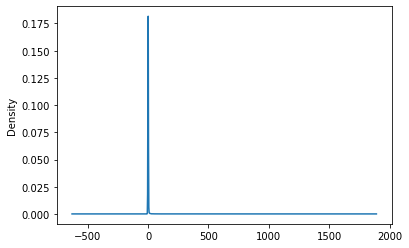

In [72]:
# Visualize the value counts
name_count.plot.density()

In [73]:
# Check the unique value counts to see if binning is required
classification_count = charity_df.CLASSIFICATION.value_counts()
classification_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1900        1
C1283        1
C1732        1
C1236        1
C2190        1
Name: CLASSIFICATION, Length: 71, dtype: int64

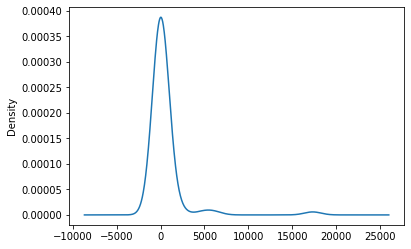

In [74]:
# Visualize the value counts
classification_count.plot.density()

In [75]:
# Determine which values to replace
replace_app = list(app_count[app_count < 800].index)

# Replace in DataFrame
for application in replace_app:
    charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(application,"Other")


# Check to make sure binning was successful
charity_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [76]:
# Determine which values to replace
replace_name = list(name_count[name_count < 500].index)

# Replace in DataFrame
for name in replace_name:
    charity_df.NAME = charity_df.NAME.replace(name,"Other")


# Check to make sure binning was successful
charity_df.NAME.value_counts()

Other                                 31574
PARENT BOOSTER USA INC                 1260
TOPS CLUB INC                           765
UNITED STATES BOWLING CONGRESS INC      700
Name: NAME, dtype: int64

In [77]:
# Determine which values to replace
replace_class = list(classification_count[classification_count < 1000].index)

# Replace in DataFrame
for class_ in replace_class:
    charity_df.CLASSIFICATION = charity_df.CLASSIFICATION.replace(class_,"Other")


# Check to make sure binning was successful
charity_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [78]:
# Examine colums types
charity_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [79]:
#  Create encode list
charity_df 
encode_list = ["APPLICATION_TYPE", "INCOME_AMT", "CLASSIFICATION", "AFFILIATION", "USE_CASE", "ORGANIZATION", "SPECIAL_CONSIDERATIONS"]

In [80]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False, drop="first")

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(charity_df[encode_list]))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(encode_list)
encode_df.head()

,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,...,AFFILIATION_Other,AFFILIATION_Regional,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [81]:
# Merge one-hot encoded features and drop the originals
merge_df = charity_df.merge(encode_df,left_index=True, right_index=True)
merge_df = merge_df.drop(encode_list,1)
merge_df.head()

,EIN,NAME,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,AFFILIATION_Other,AFFILIATION_Regional,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_Y
0,10520599,Other,1,5000,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10531628,Other,1,108590,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,10547893,Other,1,5000,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,10553066,Other,1,6692,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,10556103,Other,1,142590,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [82]:
# Drop the columns EIN and NAME
merge_df = merge_df.drop(["EIN", "NAME"],1)
merge_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,...,AFFILIATION_Other,AFFILIATION_Regional,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,108590,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,6692,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34295,1,5000,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34296,1,5000,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34297,1,5000,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [83]:
# Split our preprocessed data into our features and target arrays
y = merge_df["IS_SUCCESSFUL"].values
X = merge_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [92]:
# Examine the shape of X
X.shape

(34299, 33)

In [93]:
# Examine the shape of y
y.shape

(34299,)

In [84]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [113]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  16
hidden_nodes_layer2 =  16
hidden_nodes_layer3 =  32
hidden_nodes_layer4 =  32
hidden_nodes_layer5 =  64
hidden_nodes_layer6 =  128
hidden_nodes_layer7 =  64
hidden_nodes_layer8 =  64
hidden_nodes_layer9 =  32
hidden_nodes_layer10 =  32

nn = tf.keras.models.Sequential()

# Hidden layers
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="relu"))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="relu"))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer7, activation="relu"))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer8, activation="relu"))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer9, activation="relu"))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer10, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 16)                544       
_________________________________________________________________
dense_36 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_37 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_38 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_39 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_40 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_41 (Dense)             (None, 64)               

In [114]:
# Compile the model
optimizer=tf.keras.optimizers.Adam(lr=.0005)
nn.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [115]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=500)

Epoch 1/500
25724/25724 [==============================] - 2s 76us/sample - loss: 0.5879 - acc: 0.7007
Epoch 2/500
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5611 - acc: 0.7271
Epoch 3/500
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5580 - acc: 0.7312
Epoch 4/500
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5567 - acc: 0.7305
Epoch 5/500
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5550 - acc: 0.7313
Epoch 6/500
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5537 - acc: 0.7337
Epoch 7/500
25724/25724 [==============================] - ETA: 0s - loss: 0.5521 - acc: 0.734 - 2s 65us/sample - loss: 0.5534 - acc: 0.7333
Epoch 8/500
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5526 - acc: 0.7329
Epoch 9/500
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5522 - acc: 0.7331
Epoch 10/500
25724/25724 [=========

25724/25724 [==============================] - 2s 63us/sample - loss: 0.5423 - acc: 0.7387
Epoch 80/500
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5421 - acc: 0.7383
Epoch 81/500
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5422 - acc: 0.7385
Epoch 82/500
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5419 - acc: 0.7391
Epoch 83/500
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5417 - acc: 0.7388
Epoch 84/500
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5410 - acc: 0.7393
Epoch 85/500
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5414 - acc: 0.7396
Epoch 86/500
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5420 - acc: 0.7387
Epoch 87/500
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5409 - acc: 0.7394
Epoch 88/500
25724/25724 [==============================] - 2s 65us/sample - 

Epoch 157/500
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5393 - acc: 0.7395
Epoch 158/500
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5389 - acc: 0.7399
Epoch 159/500
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5402 - acc: 0.7390
Epoch 160/500
25724/25724 [==============================] - 2s 70us/sample - loss: 0.5390 - acc: 0.7390
Epoch 161/500
25724/25724 [==============================] - 2s 71us/sample - loss: 0.5389 - acc: 0.7399
Epoch 162/500
25724/25724 [==============================] - 2s 61us/sample - loss: 0.5399 - acc: 0.7397
Epoch 163/500
25724/25724 [==============================] - 2s 63us/sample - loss: 0.5392 - acc: 0.7397
Epoch 164/500
25724/25724 [==============================] - 2s 62us/sample - loss: 0.5387 - acc: 0.7401
Epoch 165/500
25724/25724 [==============================] - 2s 62us/sample - loss: 0.5391 - acc: 0.7403
Epoch 166/500
25724/25724 [============================

25724/25724 [==============================] - 2s 62us/sample - loss: 0.5374 - acc: 0.7403
Epoch 236/500
25724/25724 [==============================] - 2s 63us/sample - loss: 0.5396 - acc: 0.7370
Epoch 237/500
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5382 - acc: 0.7401
Epoch 238/500
25724/25724 [==============================] - 2s 62us/sample - loss: 0.5373 - acc: 0.7406
Epoch 239/500
25724/25724 [==============================] - 2s 62us/sample - loss: 0.5377 - acc: 0.7406
Epoch 240/500
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5380 - acc: 0.7409
Epoch 241/500
25724/25724 [==============================] - 2s 63us/sample - loss: 0.5375 - acc: 0.7408
Epoch 242/500
25724/25724 [==============================] - 2s 67us/sample - loss: 0.5376 - acc: 0.7412
Epoch 243/500
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5374 - acc: 0.7407
Epoch 244/500
25724/25724 [==============================] - 2s 63us/

25724/25724 [==============================] - 2s 62us/sample - loss: 0.5372 - acc: 0.7411
Epoch 313/500
25724/25724 [==============================] - 2s 61us/sample - loss: 0.5375 - acc: 0.7405
Epoch 314/500
25724/25724 [==============================] - 2s 62us/sample - loss: 0.5374 - acc: 0.7408
Epoch 315/500
25724/25724 [==============================] - 2s 62us/sample - loss: 0.5380 - acc: 0.7399
Epoch 316/500
25724/25724 [==============================] - 2s 61us/sample - loss: 0.5369 - acc: 0.7400
Epoch 317/500
25724/25724 [==============================] - 2s 62us/sample - loss: 0.5368 - acc: 0.7410
Epoch 318/500
25724/25724 [==============================] - 2s 62us/sample - loss: 0.5368 - acc: 0.7413
Epoch 319/500
25724/25724 [==============================] - 2s 63us/sample - loss: 0.5365 - acc: 0.7413
Epoch 320/500
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5365 - acc: 0.7413
Epoch 321/500
25724/25724 [==============================] - 2s 62us/

25724/25724 [==============================] - 2s 65us/sample - loss: 0.5371 - acc: 0.7397
Epoch 391/500
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5376 - acc: 0.7410
Epoch 392/500
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5363 - acc: 0.7409
Epoch 393/500
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5357 - acc: 0.7410
Epoch 394/500
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5373 - acc: 0.7408
Epoch 395/500
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5369 - acc: 0.7408
Epoch 396/500
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5375 - acc: 0.7406
Epoch 397/500
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5367 - acc: 0.7412
Epoch 398/500
25724/25724 [==============================] - 2s 63us/sample - loss: 0.5439 - acc: 0.7404
Epoch 399/500
25724/25724 [==============================] - 2s 64us/

25724/25724 [==============================] - 2s 65us/sample - loss: 0.5371 - acc: 0.7382
Epoch 469/500
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5369 - acc: 0.7407
Epoch 470/500
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5363 - acc: 0.7413
Epoch 471/500
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5359 - acc: 0.7408
Epoch 472/500
25724/25724 [==============================] - 2s 64us/sample - loss: 0.5364 - acc: 0.7407
Epoch 473/500
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5372 - acc: 0.7396
Epoch 474/500
25724/25724 [==============================] - 2s 73us/sample - loss: 0.5366 - acc: 0.7399
Epoch 475/500
25724/25724 [==============================] - 2s 68us/sample - loss: 0.5358 - acc: 0.7411
Epoch 476/500
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5358 - acc: 0.7418
Epoch 477/500
25724/25724 [==============================] - 2s 72us/

In [116]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.6030 - acc: 0.7251
Loss: 0.6030130446617527, Accuracy: 0.7251312136650085
